In [1]:
#Problem 1

import numpy as np
from scipy import linalg as la
from scipy import optimize as opt

def solveeq (A, b):
    
    Q,R = la.qr(A, mode="economic")
    xhat = la.solve_triangular(R, Q.T@b)
    return xhat

A = np.random.random((20,2))
b = np.random.random((20,1))
xhat = solveeq(A,b)
print(xhat)

[[ 0.21018254]
 [ 0.50539102]]


[   3.37476604  164.08096257]


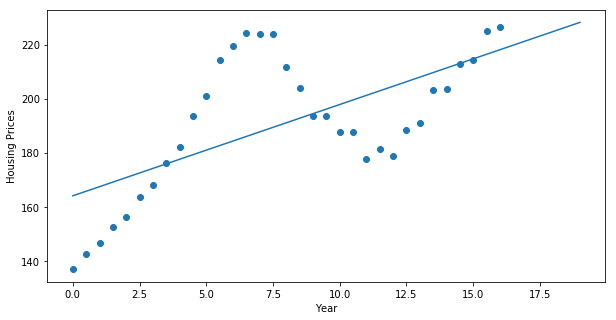

In [35]:
#Problem 2

from matplotlib import pyplot as plt
import pylab

pylab.rcParams['figure.figsize'] = (10, 5)

data = np.array(np.load("housing.npy"))

a1 = data[:,0]
b = data[:,1]
a2 = np.ones_like(a1)
A = np.vstack((a1,a2))

xhat = solveeq(A.T,b.T)

print(xhat)

xreg = np.arange(0,20)
yreg = xhat[1] + xhat[0] * xreg
plt.clf()
plt.scatter(a1, b )
plt.plot(xreg,yreg)
plt.xlabel("Year")
plt.ylabel("Housing Prices")

plt.show()

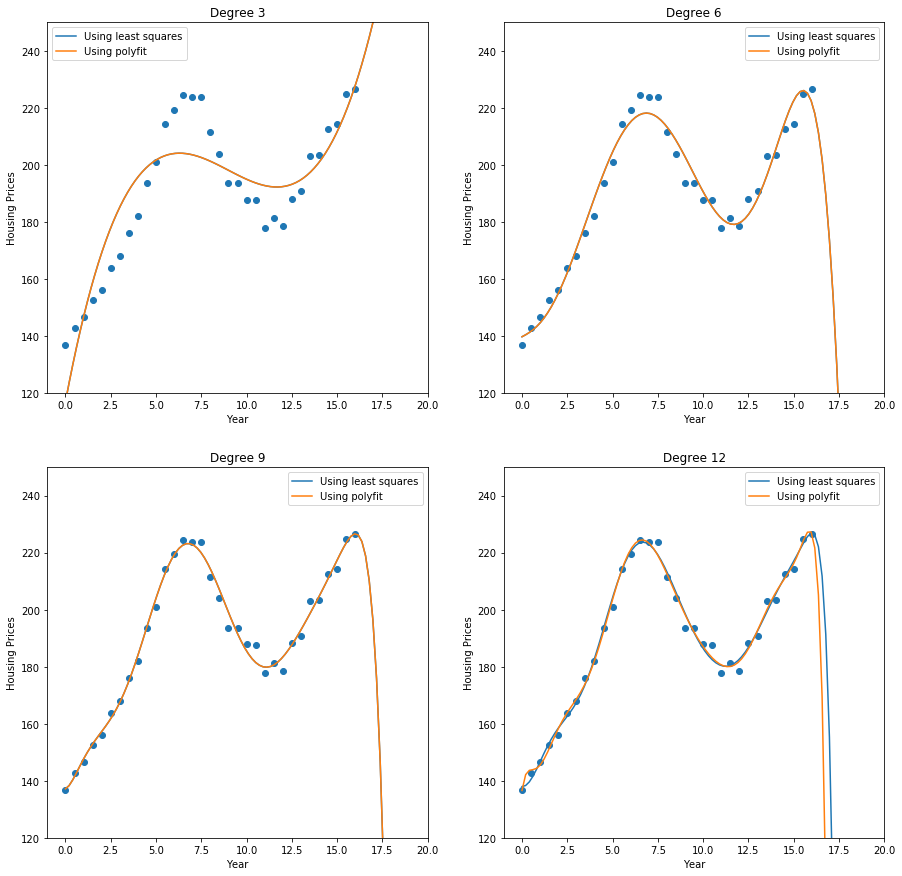

In [36]:
#Problem 3

from scipy import linalg as la

pylab.rcParams['figure.figsize'] = (15, 15)

plt.clf()
fig, axes = plt.subplots(nrows=2, ncols=2)
xreg = np.linspace(0,20,100)


#Degree 3
A = np.vander(a1, 4)
x = la.lstsq(A, b)[0]
yreg = np.polyval(x, xreg)
plt.subplot(221)
plt.scatter(a1, b )
poly_coeff = np.polyfit(a1, b, 3)
yreg1 = np.polyval(poly_coeff, xreg)
plt.plot(xreg,yreg, label = "Using least squares")
plt.plot(xreg,yreg1, label = "Using polyfit")
plt.title("Degree 3")
plt.xlim([-1, 20])
plt.ylim([120, 250])
plt.xlabel("Year")
plt.ylabel("Housing Prices")
plt.legend()

#Degree 6
A = np.vander(a1, 7)
x = la.lstsq(A, b)[0]
yreg = np.polyval(x, xreg)
plt.subplot(222)
plt.scatter(a1, b )
poly_coeff = np.polyfit(a1, b, 6)
yreg1 = np.polyval(poly_coeff, xreg)
plt.plot(xreg,yreg, label = "Using least squares")
plt.plot(xreg,yreg1, label = "Using polyfit")
plt.title("Degree 6")
plt.xlim([-1, 20])
plt.ylim([120, 250])
plt.xlabel("Year")
plt.ylabel("Housing Prices")
plt.legend()

#Degree 9
A = np.vander(a1, 10)
x = la.lstsq(A, b)[0]
yreg = np.polyval(x, xreg)
plt.subplot(223)
plt.scatter(a1, b )
poly_coeff = np.polyfit(a1, b, 9)
yreg1 = np.polyval(poly_coeff, xreg)
plt.plot(xreg,yreg, label = "Using least squares")
plt.plot(xreg,yreg1, label = "Using polyfit")
plt.title("Degree 9")
plt.xlim([-1, 20])
plt.ylim([120, 250])
plt.xlabel("Year")
plt.ylabel("Housing Prices")
plt.legend()

#Degree 12
A = np.vander(a1, 13)
x = la.lstsq(A, b)[0]
yreg = np.polyval(x, xreg)
plt.subplot(224)
plt.scatter(a1, b )
poly_coeff = np.polyfit(a1, b, 12)
yreg1 = np.polyval(poly_coeff, xreg)
plt.plot(xreg,yreg, label = "Using least squares")
plt.plot(xreg,yreg1, label = "Using polyfit")
plt.title("Degree 12")
plt.xlim([-1, 20])
plt.ylim([120, 250])
plt.xlabel("Year")
plt.ylabel("Housing Prices")
plt.legend()

plt.show()

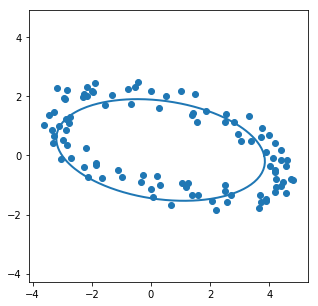

In [87]:
#Problem 4

pylab.rcParams['figure.figsize'] = (5, 5)

def plot_ellipse(a, b, c, d, e):
    """Plot an ellipse of the form ax^2 + bx + cxy + dy + ey^2 = 1."""
    plt.clf()
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A))/(2*A)
    plt.plot(r*cos_t, r*sin_t, lw=2)
    plt.gca().set_aspect("equal", "datalim")
    plt.scatter(x,y)
    return

data = np.array(np.load("ellipse.npy"))

x = data[:,0]
y = data[:,1]

A = np.column_stack((x**2, 2*x, 2*x*y, 2*y, y**2))
b = np.ones_like(x)
c1, c2, c3, c4, c5 = la.lstsq(A, b)[0]
plot_ellipse(c1, c2, c3, c4, c5)

plt.show()

In [5]:
#Problem 5

def pm(A, N, tol = 0.01):
    m,n = np.shape(A)
    x0 = np.random.random(n)
    x0 = x0 / la.norm(x0)
    k=0
    diff = 2 * tol
    while ( k < N or diff > tol ):
        x1 = A @ x0
        x1 = x1 / la.norm(x1)
        k += 1
        diff = la.norm(x1 - x0)
        x0 = x1
    return x1.T @ A @ x1, x1

A = np.random.random((2,2))
eigs, vecs = la.eig(A)
loc = np.argmax(eigs)
lamb, x = eigs[loc], vecs[:,loc]

print(x)
print(lamb)

#Test function
lamb1, x1 = pm(A, 100)
print(x1)
print(lamb1)

print(np.allclose(A.dot(x1), lamb1*x1))
print(np.allclose(lamb, lamb1))

[-0.81085665 -0.58524482]
(1.08796489199+0j)
[ 0.81085665  0.58524482]
1.08796489199
True
True


In [30]:
#Problem 6

import cmath

def qralg (A, N, tol = 0.0001):

    m,n = np.shape(A)
    S = la.hessenberg(A)
    k=0
    for k in range (0, N):
        Q, R = la.qr(S, mode="economic")
        S = R @ Q
    eigs = []
    i = 0
    while (i < n):
        if S[i,i] == S[np.shape(S)[0] - 1, np.shape(S)[1] - 1] or np.abs(S[ i + 1,i]) < tol:
            eigs.append([S[i,i]])
        else:
            a = S[0,0]
            b = S[0,1]
            c = S[1,0]
            d = S[1,1]
            eig1 = ((a + d) + cmath.sqrt((a + d) **2 - 4 * (a * d - b * c))) / 2
            eig2 = ((a + d)  - cmath.sqrt((a + d) **2 - 4 * (a * d - b * c))) / 2
            eigs.append([eig1])
            eigs.append([eig2])
            i += 1
        i +=1
        
    return eigs

A = np.random.random((3,3))
A = A + A.T

eigs1, vecs1 = la.eig(A)

eigs = qralg(A, 100)

print(eigs1)
print(eigs)

[ 2.74605905+0.j -0.64963547+0.j  0.42447668+0.j]
[[2.7460590476161388], [-0.64963547213263684], [0.42447667663824962]]
